In [7]:
import numpy as np
from scipy.interpolate import CubicSpline

In [39]:
def nodos(f,a,b,n):  # Nodos equiespaciados
    return np.array([(xi,f(xi)) for xi in srange(a,b,(b-a)/(n-1), include_endpoint=True)])

def p(nodos): # Genera el polinomio de interpolación en el soporte de nodos `nodos`
    return RR['x'].lagrange_polynomial(nodos)

def chebyshev_nodes(a,b,n): # genera los `n` nodos de Chebyshev en el intervalo [a,b]
    return [(a+b)/2 + (b-a)/2*cos(pi*(2*k+1)/(2*n)) for k in range(n)]

def norma_unif(f,a,b,n=1_000):
    ff = fast_callable(f,vars=[x],domain=float)
    return max([f(x) for x in srange(a,b,(b-a)/n)])

In [4]:
class PlotWrapper():
    """Una clase para generar los gráficos de la funcion a interpolar,
    junto con la función interpolatoria y representando el soporte de datos
    en el intervalo [a,b].

    Attributes:
        datos              Una lista de tuplas de la forma [(xi,yi), ...] donde xi 
                           es la abscisa e yi las coordenadas.
        function           La función que se deseea interpolar.
        interp_function    La función que interpola a `funcion`.
        a                  Extremo inferior de intervalo.
        b                  Extremo superior de intervalo.
        color              Color con el que se pinta la función interpolatoria.
    """
    def __init__(self,datos,function, interp_function,color="red"):
        self.a = min([d[0] for d in datos])
        self.b = max(d[0] for d in datos)
        self.datos = list(datos)
        self.f = function
        self.p = interp_function
        self.color = color
    
    
    def plot(self,ymin=None,ymax=None):
        """
        Genera el gráfico de la función original, las función a interpolar y los
        datos en el intervalo [a,b].
        """
        P =  plot(self.f(x),x,self.a,self.b,ymax=ymax,ymin=ymin)
        P += plot(lambda x: self.p(x),x,self.a,self.b,color=self.color)
        P += point(self.datos,size=20)
        return P
    
    def save(self,fname:str,dpi=150,ymin=None,ymax=None):
        """
        Guarda el gráfico en el fichero `fname`.
        """
        self.plot(ymin,ymax).save(fname,dpi=dpi)
    def error(self,n=100):
        """
        Aproxima el error absoluto de la función `aprox` al interpolar a `f` en
        el intervalo [a,b] considerando `n` nodos en le intervalo.
        """
        ff = fast_callable(self.f,vars=[x],domain=float)
        return max([N(abs(ff(x) - self.p(x))) for x in srange(self.a,self.b,(self.b-self.a)/n)])

In [5]:
class Spline_Lineal():
    """
    Genera la spline lineal dada una lista de datos de la 
    forma [(xi,yi), ...] donde xi es la abscisa e yi la coordenada.
    """
    def __init__(self,nodos:list):
        self.nodos = nodos
    
    def __call__(self,x):
        i = 0
        stop = False
        while i < len(self.nodos)-1 and not stop:
            if self.nodos[i][0] <= x and x <= self.nodos[i+1][0]:
                stop = True
            else:
                i += 1
        xi, yi = self.nodos[i]
        xip1, yip1 = self.nodos[i+1]
        return yi + (yip1-yi)/(xip1 - xi) * (x-xi)

Función de Runge

In [5]:
f(x) = 1/(1+25*x^2)

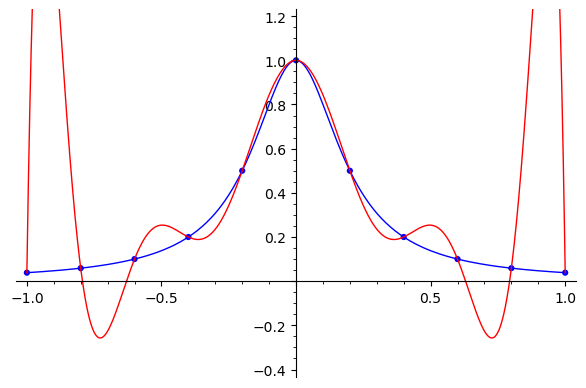

In [4]:
f(x) = 1/(1+25*x^2)
datos = nodos(f,-1,1,11)

P = PlotWrapper(datos,f,p(datos))
P.plot(-0.4,1.2)

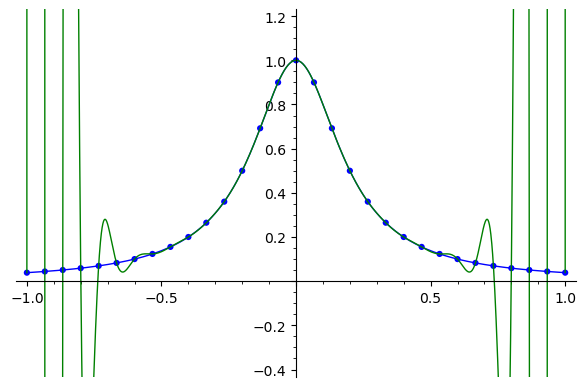

In [13]:
datos = nodos(f,-1,1,31)
P = PlotWrapper(datos,f,p(datos),color="green")

P.plot(-0.4,1.2)

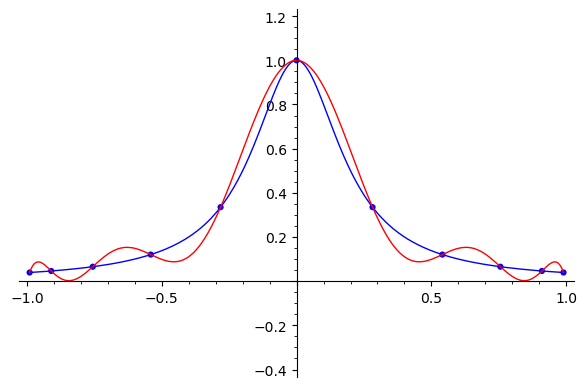

In [15]:
datos = [(z,f(z)) for z in chebyshev_nodes(-1,1,11)]
P = PlotWrapper(datos,f,p(datos))
P.plot(-0.4,1.2)

In [44]:
P.save("figuras/Runge_chevyshev_n10.svg",dpi=150)

# Spline

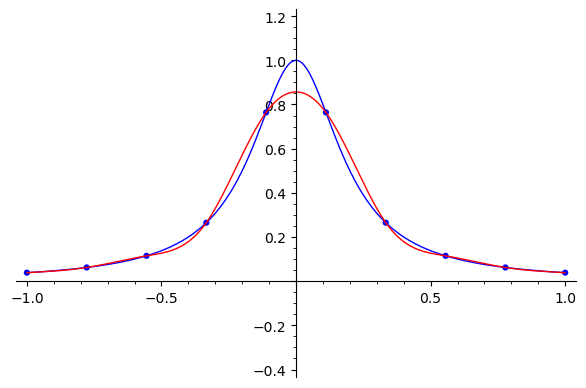

In [28]:
f(x) = 1/(1+25*x^2)
datos = nodos(f,-1,1,10)
S = spline(datos)

P = PlotWrapper(datos,f,S)
P.plot(-0.4,1.2)

In [29]:
P.error(10_000)

0.142874354111538

## Spline lineal

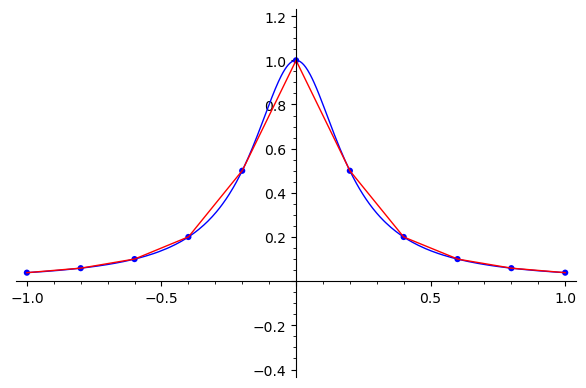

In [32]:
datos = nodos(f,-1,1,11)
S = Spline_Lineal(datos)
P = PlotWrapper(datos,f,S)
P.plot(-0.4,1.2)

In [33]:
P.error(10_000)

0.0674421560550783

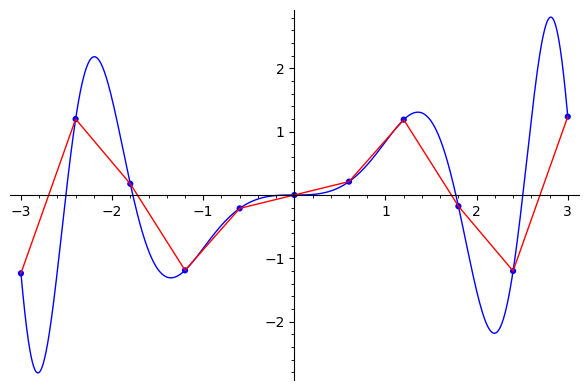

In [37]:
f(x) = x*sin(x^2)
datos = nodos(f,-3,3,n=11)
S = Spline_Lineal(datos)

P = PlotWrapper(datos,f,S)
P.plot()

In [51]:
P.save("figuras/Seno_Spline_Linealn10.svg",dpi=150)

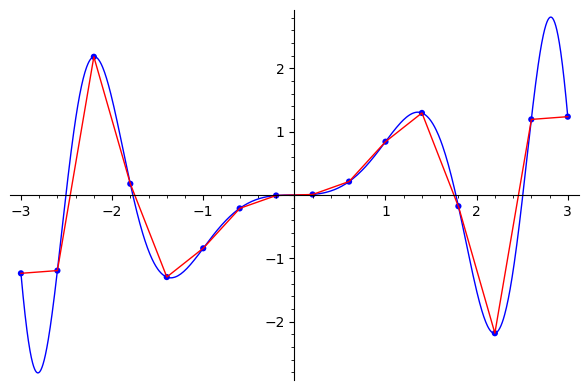

In [40]:
datos = nodos(f,-3,3,n=16)
S = Spline_Lineal(datos)

P = PlotWrapper(datos,f,S)
P.plot()

In [55]:
P.save("figuras/Seno_Spline_Linealn16.svg",dpi=150)

In [41]:
P.error(10000)

1.59189936625368

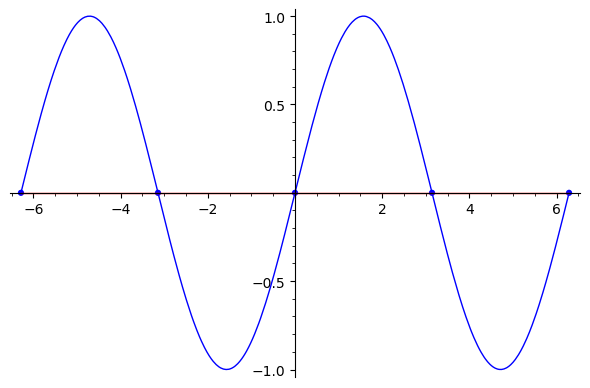

In [43]:
f(x) = sin(x)

datos = nodos(f,-2*pi,2*pi,n=5)
S = Spline_Lineal(datos)
P = PlotWrapper(datos,f,S)
P.plot()

In [ ]:
P.save

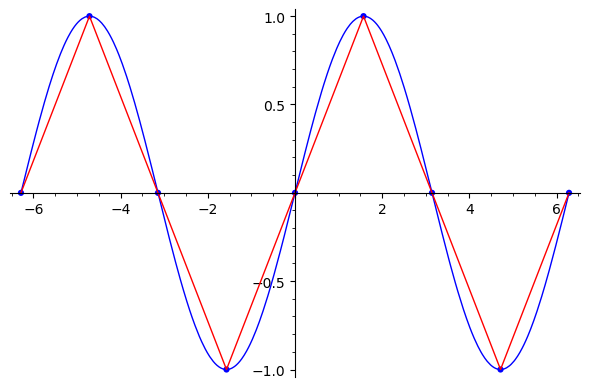

In [47]:
f(x) = sin(x)

datos = nodos(f,-2*pi,2*pi,n=9)
S = Spline_Lineal(datos)

P = PlotWrapper(datos,f,S)
P.plot()

In [48]:
P.error(10_000).n(digits=6)

0.210514

In [61]:
P.save(f"figuras/Sin_Spline_lineal_n{n}.svg",dpi=150)

## Spline Cúbica

In [49]:
from scipy.interpolate import CubicSpline
import numpy as np

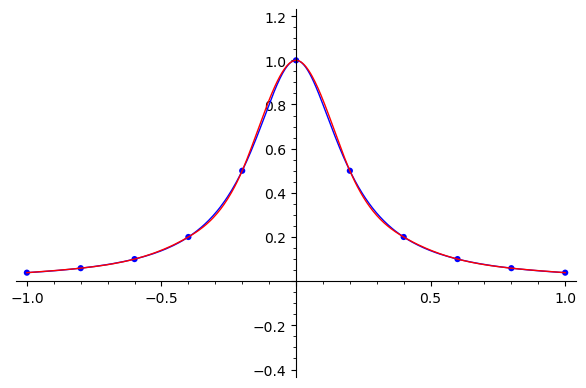

In [59]:
f(x) = 1/(1+25*x^2)

datos = np.array(nodos(f,-1,1,11))
S = CubicSpline(datos[:,0],datos[:,1],bc_type="natural")

P = PlotWrapper(datos,f,lambda x: float(S(x)))
P.plot(-0.4,1.2)

In [56]:
P.error(10_000)

0.0219617878073306

In [60]:
f(x) = x*sin(x^2)
a,b = (-pi,pi)
n = 13
datos = np.array(nodos(f,a,b,n))

clamped 2.56451
not-a-knot 0.859860
natural 1.76467


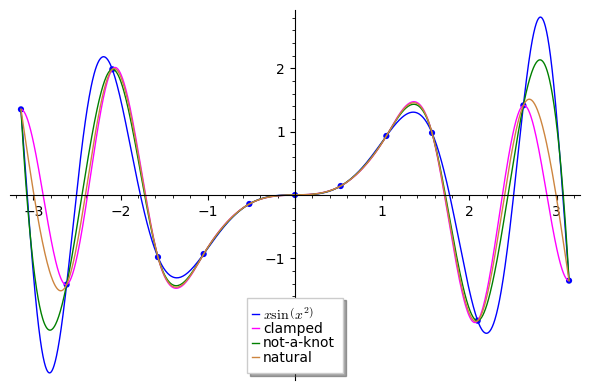

In [61]:
tipos = ["clamped","not-a-knot","natural"]
colores=["magenta","green","peru"]

P = plot(f(x),x,a,b,legend_label=f"${latex(f(x))}$")
P += point(nodos(f,a,b,n),size=20)

splines = [CubicSpline(datos[:,0],datos[:,1],bc_type=tipo) for tipo in tipos]

for tipo, color in zip(tipos,colores):
    S = CubicSpline(datos[:,0],datos[:,1],bc_type=tipo)
    P += plot(lambda x: float(S(x)),x,a,b,color=color,legend_label=tipo)
    E = error(f,lambda x: float(S(x)),a,b,10000)
    print(tipo,E.n(digits=6))

P.show(show_legend=True)

In [93]:
P.save("figuras/xsinxsr_CubicSpline_n13.svg",dpi=150)

# Cota del error

$$
\lVert f - S\lVert \leq \frac{5}{384}\lvert \Delta\lvert^4 \,\lVert f^{(4)}\lVert
$$

In [56]:
f(x) = x*sin(x^2)

datos = nodos(f,-3,3,11)

h = datos[1][0] - datos[0][0]

S = CubicSpline(datos[:,0],datos[:,1],bc_type="natural")

In [58]:
E(x) = 5/384 *h^4 * norma_unif(diff(f,4),-3,3,1_000)

P_error = PlotWrapper([(x[0],0) for x in datos],
                        lambda x: abs(E(x)),
                        lambda x: abs(f(x) - S(x)))
P = PlotWrapper(datos,f,lambda x: S(x))

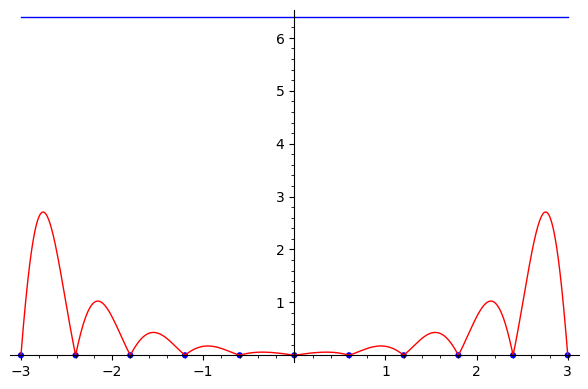

In [59]:
P_error.plot()

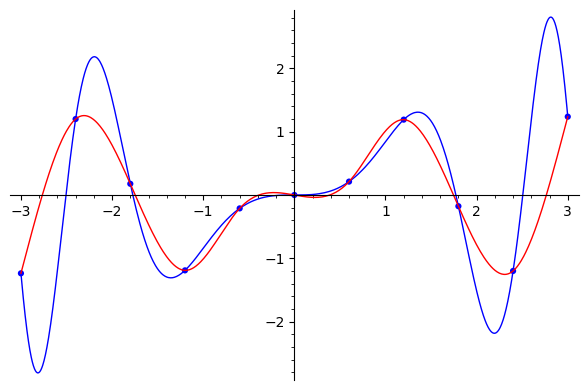

In [60]:
P.plot()

In [61]:
P.save("figuras/xsinxsr_CS_n11.svg")

In [63]:
P_error.save("figuras/xinssr_CS_Error_n11.svg")

In [66]:
E(x).n(digits=6)

6.40230

In [68]:
f(x) = 1/(1+25*x^2)

a,b = (-1,1)

datos = nodos(f,a,b,11)

h = datos[1][0] - datos[0][0]

S = CubicSpline(datos[:,0],datos[:,1],bc_type="natural")

In [69]:
E(x) = 5/384 *h^4 * norma_unif(diff(f,4),a,b,1_000)

P_error = PlotWrapper([(x[0],0) for x in datos],
                        lambda x: abs(E(x)),
                        lambda x: abs(f(x) - S(x)))
P = PlotWrapper(datos,f,lambda x: S(x))

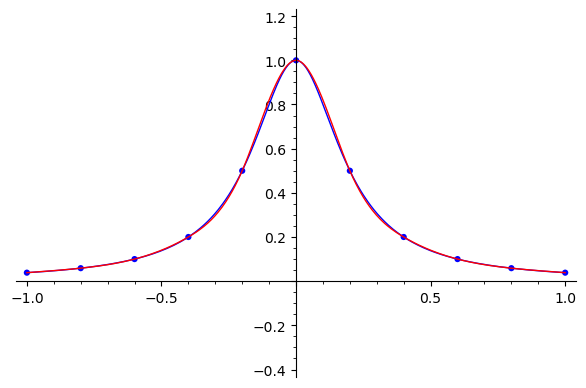

In [71]:
P.plot(-0.4,1.2)

In [72]:
P.save("figuras/Runge_Cubic_natural_n11.svg")

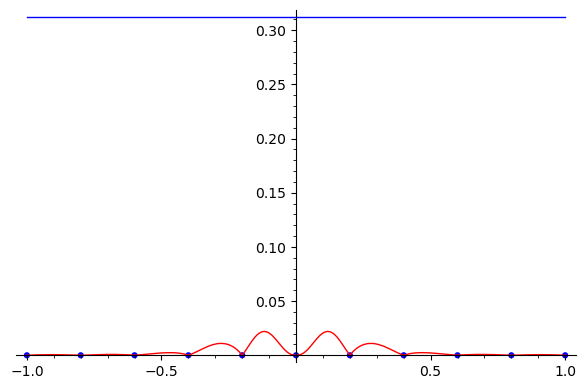

In [73]:
P_error.plot()

In [74]:
P_error.save("figuras/Runge_Cubic_natural_error_n11.svg")

In [75]:
E(x).n(digits=6)

0.312500

In [76]:
f(x) = 1/(1+25*x^2)

datos = [(z,f(z)) for z in chebyshev_nodes(-1,1,11)]
P_Chebyshev = PlotWrapper(datos,f,p(datos))

datos = nodos(f,-1,1,11)
P_Lagrange = PlotWrapper(datos,f,p(datos))

S = CubicSpline(datos[:,0],datos[:,1],bc_type="natural")
P_Spline = PlotWrapper(datos,f,lambda x: S(x))

In [77]:
print("lagrange:", P_Lagrange.error(10_000))
print("Chebyshev:", P_Chebyshev.error(10_000))
print("Spline:", P_Spline.error(10_000))

lagrange: 1.91565880278494
Chebyshev: 0.109153491919021
Spline: 0.0219738257495820
